In [35]:
import pandas as pd 
  
# Getting the data of users and their ratings from the csv file 
column_names = ['user_id', 'item_id', 'rating', 'timestamp']   
df = pd.read_csv('ratings.csv', sep='\t', names=column_names) 
df.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [36]:
#getting the music directory
songs = pd.read_csv('Songs.csv') 
songs.head()  

,item_id,title
0,1,Stranger in Paradise
1,2,Break My Stride
2,3,Into The Nightlife
3,4,It's About Time
4,5,Popular Modern Themes


In [37]:
data = pd.merge(df, songs, on='item_id') 
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Sunset Road
1,290,50,5,880473582,Sunset Road
2,79,50,4,891271545,Sunset Road
3,2,50,5,888552084,Sunset Road
4,8,50,5,879362124,Sunset Road


In [38]:
# Calculate mean ratings of all Music 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Stay Tuned                   5.0
Tryin' to Get to Heaven      5.0
I Wanna Hold You             5.0
I Wish It Would Rain         5.0
Kilka usciskow kilka snow    5.0
Name: rating, dtype: float64

In [39]:
# Calculate count ratings of all music 
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Sunset Road            584
Shake And Fingerpop    509
Killa Soundboy         508
Into Eternity          507
Let Her Dance          485
Name: rating, dtype: int64

In [40]:
# creating dataframe with 'ratings' count values 
rating = pd.DataFrame(data.groupby('title')['rating'].mean()) 
rating['num of rating'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
rating.head() 

,rating,num of rating
title,,
(Sittin' On) The Dock Of The Bay,2.166667,6
(arrow up),3.555556,45
100 Ways,4.015625,64
13 Steps Lead Down,3.431034,116
14th Street,3.714286,7


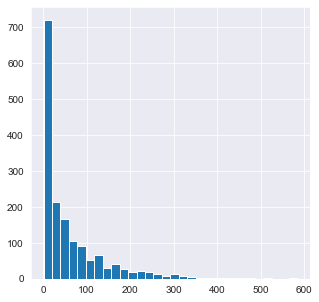

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("dark") 
%matplotlib inline 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(5, 5)) 
rating['num of rating'].hist(bins = 30) 

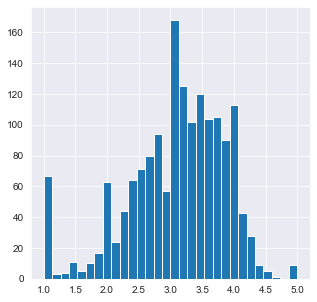

In [54]:
# plot graph of 'ratings' column 

plt.figure(figsize =(5, 5)) 
rating['rating'].hist(bins = 30)

In [43]:
# Sorting values according to 
# the 'num of ratings column' 
music = data.pivot_table(index ='user_id',columns ='title', values ='rating') 
music.head() 
rating.sort_values('num of rating', ascending = False).head(10)

,rating,num of rating
title,,
Sunset Road,4.359589,584
Shake And Fingerpop,3.803536,509
Killa Soundboy,4.155512,508
Into Eternity,4.007890,507
Let Her Dance,3.156701,485
Cripple and the Starfish,3.656965,481
Lovefool,3.441423,478
Stranger in Paradise,3.858065,465
What's Going On,3.420259,464


In [44]:
# analysing correlation with dustyroad music
dustyroads_user_rating = music['Dusty Roads'] 
INeverCame_user_rating = music['I Never Came'] 
dustyroads_user_rating.head()

user_id
0    NaN
1    2.0
2    NaN
3    NaN
4    4.0
Name: Dusty Roads, dtype: float64

In [45]:
# analysing correlation with I Never Came music
INeverCame_user_rating.head()

user_id
0    NaN
1    1.0
2    NaN
3    NaN
4    NaN
Name: I Never Came, dtype: float64

In [46]:
# analysing correlation with similar music 
similar_to_dustyroads = music.corrwith(dustyroads_user_rating) 
similar_to_INeverCame = music.corrwith(INeverCame_user_rating) 
corr_dustyroads = pd.DataFrame(similar_to_dustyroads, columns =['Correlation']) 
corr_dustyroads.dropna(inplace = True) 
corr_dustyroads.head() 

C:\Users\Ashok\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Ashok\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
(Sittin' On) The Dock Of The Bay,-0.288675
(arrow up),0.225175
100 Ways,-0.084872
13 Steps Lead Down,0.267453
15 Step,0.462910


In [47]:
# Similar music like dustyroads 
corr_dustyroads.sort_values('Correlation', ascending = False).head(10) 
corr_dustyroads = corr_dustyroads.join(rating['num of rating']) 
corr_dustyroads.head() 
corr_dustyroads[corr_dustyroads['num of rating']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of rating
title,,
Dusty Roads,1.000000,236
Heart-Shaped Box,0.537958,198
Only You Can Make You Happy,0.492304,111
I Love You More Than You'll Ever Know,0.454740,171
Tel que tu es,0.445927,188


In [48]:
# Similar music as of I Never Came 
corr_INeverCame = pd.DataFrame(similar_to_INeverCame, columns =['Correlation']) 
corr_INeverCame.dropna(inplace = True) 
corr_INeverCame = corr_INeverCame.join(rating['num of rating']) 
corr_INeverCame[corr_INeverCame['num of rating']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of rating
title,,
I Never Came,1.000000,114
Despite What You've Been Told,0.624417,101
Around the World in a Tea Daze,0.611052,132
Ghettomusick,0.587782,112
Victor Jara,0.568909,120
